<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2_8)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,86.745827,659.762155,756.507981,205.226906,551.281075
1,0.0,1.0,98.972553,-230.972473,-121.999919,250.565142,-372.565062
2,0.0,2.0,87.669599,-259.596558,-161.926959,208.652370,-370.579329
3,0.0,3.0,65.384174,-338.329080,-262.944906,126.015217,-388.960123
4,0.0,4.0,61.368186,247.614845,318.983031,111.123429,207.859602
...,...,...,...,...,...,...,...
119995,999.0,115.0,90.310202,34.140021,134.450223,101.632778,32.817445
119996,999.0,116.0,86.598552,60.925091,157.523643,98.870140,58.653503
119997,999.0,117.0,66.218914,254.074427,330.293341,83.701263,246.592077
119998,999.0,118.0,60.757851,615.509348,686.267199,79.636510,606.630688


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    86.745827  659.762155  756.507981  205.226906  551.281075
      1.0    98.972553 -230.972473 -121.999919  250.565142 -372.565062
      2.0    87.669599 -259.596558 -161.926959  208.652370 -370.579329
      3.0    65.384174 -338.329080 -262.944906  126.015217 -388.960123
      4.0    61.368186  247.614845  318.983031  111.123429  207.859602
...                ...         ...         ...         ...         ...
999.0 115.0  90.310202   34.140021  134.450223  101.632778   32.817445
      116.0  86.598552   60.925091  157.523643   98.870140   58.653503
      117.0  66.218914  254.074427  330.293341   83.701263  246.592077
      118.0  60.757851  615.509348  686.267199   79.636510  606.630688
      119.0  90.925526  253.441657  354.367183  102.090773  252.276410

[120000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    86.745827  659.762155  756.507981  205.226906  551.281075
      1.0    98.972553 -230.972473 -121.999919  250.565142 -372.565062
      2.0    87.669599 -259.596558 -161.926959  208.652370 -370.579329
      3.0    65.384174 -338.329080 -262.944906  126.015217 -388.960123
      4.0    61.368186  247.614845  318.983031  111.123429  207.859602
...                ...         ...         ...         ...         ...
999.0 115.0  90.310202   34.140021  134.450223  101.632778   32.817445
      116.0  86.598552   60.925091  157.523643   98.870140   58.653503
      117.0  66.218914  254.074427  330.293341   83.701263  246.592077
      118.0  60.757851  615.509348  686.267199   79.636510  606.630688
      119.0  90.925526  253.441657  354.367183  102.090773  252.276410

[120000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,86.745827,659.762155,756.507981,205.226906,551.281075
1,0.0,1.0,98.972553,-230.972473,-121.999919,250.565142,-372.565062
2,0.0,2.0,87.669599,-259.596558,-161.926959,208.652370,-370.579329
3,0.0,3.0,65.384174,-338.329080,-262.944906,126.015217,-388.960123
4,0.0,4.0,61.368186,247.614845,318.983031,111.123429,207.859602
...,...,...,...,...,...,...,...
119995,999.0,115.0,90.310202,34.140021,134.450223,101.632778,32.817445
119996,999.0,116.0,86.598552,60.925091,157.523643,98.870140,58.653503
119997,999.0,117.0,66.218914,254.074427,330.293341,83.701263,246.592077
119998,999.0,118.0,60.757851,615.509348,686.267199,79.636510,606.630688


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    86.745827  659.762155  756.507981  205.226906  551.281075
      1.0    98.972553 -230.972473 -121.999919  250.565142 -372.565062
      2.0    87.669599 -259.596558 -161.926959  208.652370 -370.579329
      3.0    65.384174 -338.329080 -262.944906  126.015217 -388.960123
      4.0    61.368186  247.614845  318.983031  111.123429  207.859602
...                ...         ...         ...         ...         ...
999.0 115.0  90.310202   34.140021  134.450223  101.632778   32.817445
      116.0  86.598552   60.925091  157.523643   98.870140   58.653503
      117.0  66.218914  254.074427  330.293341   83.701263  246.592077
      118.0  60.757851  615.509348  686.267199   79.636510  606.630688
      119.0  90.925526  253.441657  354.367183  102.090773  252.276410

[120000 rows x 5 columns]

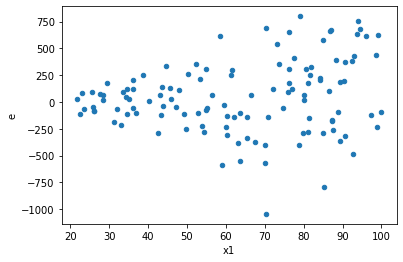

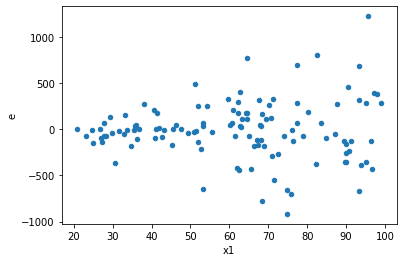

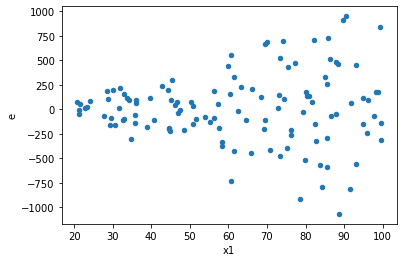

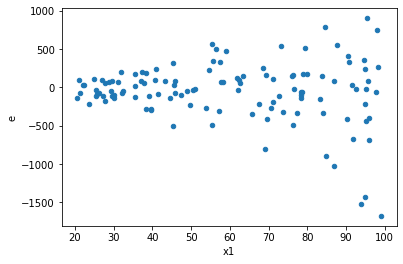

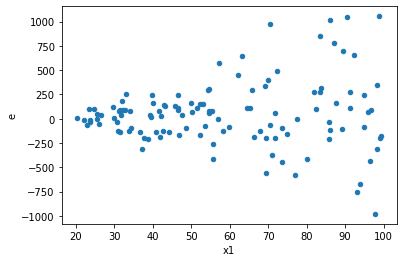

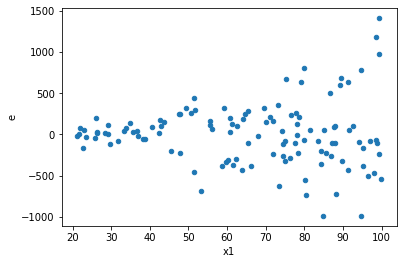

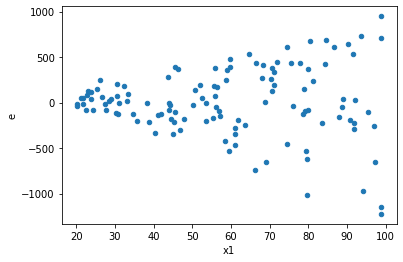

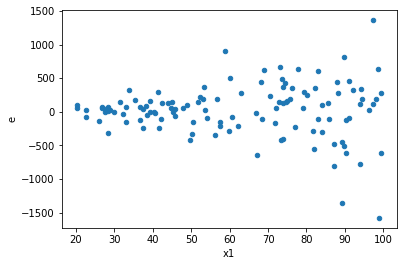

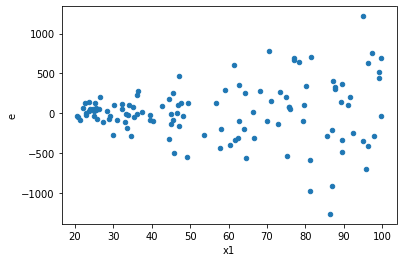

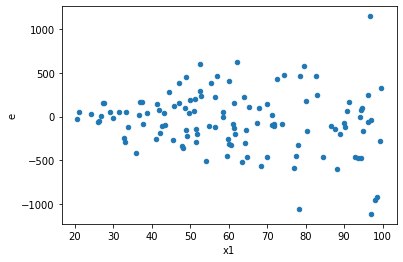

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,56.0,62.0,2241064.8115847516,9572384.070701463,40019.01449258485,154393.29146292683,3.857998339552676,4.7415868364986125e-07,0.9999997629206582,2.3707934182493062e-07,Reject001=0 : Heteroscedasticity
1.0,46.0,72.0,1335323.1660515317,10506755.299407676,29028.764479381123,145927.1569362177,5.026984770222256,1.1694778478954504e-09,0.9999999994152611,5.847389239477252e-10,Reject001=0 : Heteroscedasticity
4.0,66.0,52.0,1672420.3140311416,11546078.91577879,25339.70172774457,222039.9791495921,8.762533258490544,2.1183055309847987e-13,0.9999999999998941,1.0591527654923993e-13,Reject001=0 : Heteroscedasticity
5.0,50.0,68.0,2331615.6424634685,14682130.15559174,46632.31284926937,215913.67875870204,4.630130172968355,8.481624957923373e-09,0.9999999957591875,4.240812478961686e-09,Reject001=0 : Heteroscedasticity
6.0,64.0,54.0,2620636.2352614696,14275007.161463501,40947.44117596046,264351.9844715463,6.455885322249215,6.795564111428121e-11,0.9999999999660222,3.3977820557140603e-11,Reject001=0 : Heteroscedasticity
7.0,58.0,60.0,2576635.5220818683,15037811.117811134,44424.75038072187,250630.18529685223,5.641679089897898,3.166140682964169e-10,0.999999999841693,1.5830703414820846e-10,Reject001=0 : Heteroscedasticity
8.0,60.0,58.0,1676619.8903663955,13695106.641351271,27943.664839439924,236122.52829915987,8.44994848227261,6.23945339839338e-14,0.9999999999999688,3.11972669919669e-14,Reject001=0 : Heteroscedasticity
9.0,72.0,46.0,4672141.8311789455,8936004.403422749,64890.858766374244,194260.96529179887,2.9936568722444283,0.00012637456298159044,0.9999368127185092,6.318728149079522e-05,Reject001=0 : Heteroscedasticity
11.0,53.0,65.0,1557763.0835336335,14618833.085063051,29391.756293087423,224905.1243855854,7.651979764083723,1.170175067954915e-13,0.9999999999999415,5.850875339774575e-14,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,56.0,62.0,2241064.8115847516,9572384.070701463,40019.01449258485,154393.29146292683,3.857998339552676,4.7415868364986125e-07,Reject001=0 : Heteroscedasticity
1.0,46.0,72.0,1335323.1660515317,10506755.299407676,29028.764479381123,145927.1569362177,5.026984770222256,1.1694778478954504e-09,Reject001=0 : Heteroscedasticity
2.0,60.0,58.0,12777374.742240515,2530244.1104305843,212956.2457040086,43624.89845569973,0.2048538107510343,6.291082976244761e-09,Reject001=0 : Heteroscedasticity
3.0,57.0,61.0,14986398.9526993,2578470.5718265665,262919.27987191756,42270.009374206005,0.16077181329112894,7.199475579950682e-11,Reject001=0 : Heteroscedasticity
4.0,66.0,52.0,1672420.3140311416,11546078.91577879,25339.70172774457,222039.9791495921,8.762533258490544,2.1183055309847987e-13,Reject001=0 : Heteroscedasticity
5.0,50.0,68.0,2331615.6424634685,14682130.15559174,46632.31284926937,215913.67875870204,4.630130172968355,8.481624957923373e-09,Reject001=0 : Heteroscedasticity
6.0,64.0,54.0,2620636.2352614696,14275007.161463501,40947.44117596046,264351.9844715463,6.455885322249215,6.795564111428121e-11,Reject001=0 : Heteroscedasticity
7.0,58.0,60.0,2576635.5220818683,15037811.117811134,44424.75038072187,250630.18529685223,5.641679089897898,3.166140682964169e-10,Reject001=0 : Heteroscedasticity
8.0,60.0,58.0,1676619.8903663955,13695106.641351271,27943.664839439924,236122.52829915987,8.44994848227261,6.23945339839338e-14,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64